# **Deteksi Menggunakan Haar Cascade**

In [2]:
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


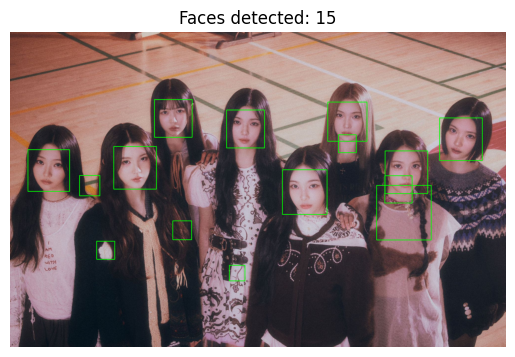

In [3]:
img = cv2.imread("/content/drive/MyDrive/Praktikum Pengolahan Citra_G.211.22.0123/dataset/people.jpg")
assert img is not None, "people.jpg tidak ditemukan(placeholder). Ganti dengan foto manusia untuk deteksi yang akurat"

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

for(x, y, w, h) in faces:
  cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.axis('off'); plt.title(f'Faces detected: {len(faces)}'); plt.show()

# **Deteksi Menggunakan MTCNN**

In [4]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 53.3 MB/s eta 0:00:00


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


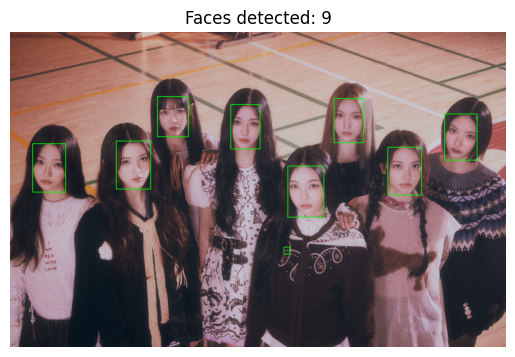

In [6]:
from mtcnn import MTCNN
import cv2

img = cv2.imread("/content/drive/MyDrive/Praktikum Pengolahan Citra_G.211.22.0123/dataset/people.jpg")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

detector = MTCNN()
faces = detector.detect_faces(rgb_img)

for face in faces:
  x, y, w, h = face['box']
  cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f'Faces detected: {len(faces)}')
plt.show()

**Tugas: Buatlah deteksi wajah 10 data berikan informasi nama dan usia**

**Data wajah yang diambil adalah data temanmu**

In [ ]:
from mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt
import os
os.environ['PYDEVD_DISABLE_FILE_VALIDATION'] = '1'
print('PYDEVD_DISABLE_FILE_VALIDATION set to 1')

# --- 1. Path folder dataset di Google Drive ---
folder_path = '/content/drive/MyDrive/Praktikum Pengolahan Citra_G.211.22.0123/wajah_teman'

# --- 2. Inisialisasi detektor wajah ---
detector = MTCNN()

# --- 3. Loop semua file di folder ---
for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        # Baca gambar
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Deteksi wajah
        faces = detector.detect_faces(rgb_img)

        # --- 4. Ekstrak nama dan umur dari nama file ---
        # Format nama file: nama_umur.jpg  (contoh: aldi_22.jpg)
        nama_file = os.path.splitext(filename)[0]
        parts = nama_file.split('_')

        # Nama = bagian awal, huruf pertama kapital
        nama = parts[0].capitalize() if len(parts) > 0 else "Unknown"

        # Umur = angka setelah underscore (kalau ada)
        umur = re.findall(r'\d+', nama_file)
        umur = umur[0] if umur else "N/A"

        # --- 5. Gambar kotak dan teks di wajah ---
        for face in faces:
            x, y, w, h = face['box']
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            label = f"{nama}, {umur} th"
            font_scale = max(0.5, img.shape[0] / 600)
            thickness = int(max(1, img.shape[0] / 400))

            cv2.putText(img, f"{nama} ({umur} th)", (x, y-10),
            cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0,255,0), thickness, cv2.LINE_AA)

        # --- 6. Tampilkan hasil ---
        plt.figure(figsize=(6, 6))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f"Wajah: {nama} ({umur} th) | Terdeteksi: {len(faces)}")
        plt.show()

cv2.destroyAllWindows()

PYDEVD_DISABLE_FILE_VALIDATION set to 1
